In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.dsn_util import get_system_from_template


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
p = 0.6
std = 0.05
var = std**2
inact_str = "NI"
Ntrials = 1000
param_dict = {
    "behavior_type":"WTA",
    "p":p,
    "var":var,
    "inact_str":inact_str,
    "N":Ntrials,
    }

system = get_system_from_template('SCCircuit', param_dict)

In [11]:
M = 1000
minval = -10.0
maxval = 10.0
sW_P = np.random.uniform(0, maxval, (M,))
sW_A = np.random.uniform(0, maxval, (M,))
vW_PA = np.random.uniform(minval, 0, (M,))
vW_AP = np.random.uniform(minval, 0, (M,))
dW_PA = np.random.uniform(0, maxval, (M,))
dW_AP = np.random.uniform(minval, 0, (M,))
hW_P = np.random.uniform(-20.0, -5, (M,))
hW_A = np.random.uniform(-20.0, -5, (M,))

_Z = np.expand_dims(np.stack([sW_P, sW_A, 
                              vW_PA, vW_AP, 
                              dW_PA, dW_AP,
                              hW_P, hW_A], axis=1), axis=0)
Z = tf.placeholder(tf.float64, (1, None, system.D))

v_t = system.simulate(Z)
T_x = system.compute_suff_stats(Z)
I_x = system.compute_I_x(Z, T_x)

In [12]:
with tf.Session() as sess:
    _v_t, _T_x, _I_x = sess.run([v_t, T_x, I_x], {Z:_Z})
print('v(t)', _v_t.shape)
print('T(x)', _T_x.shape)
print('I(x)', _I_x.shape)

v(t) (75, 2, 1000, 4, 1000)
T(x) (1, 1000, 8)
I(x) (1, 1000, 2)


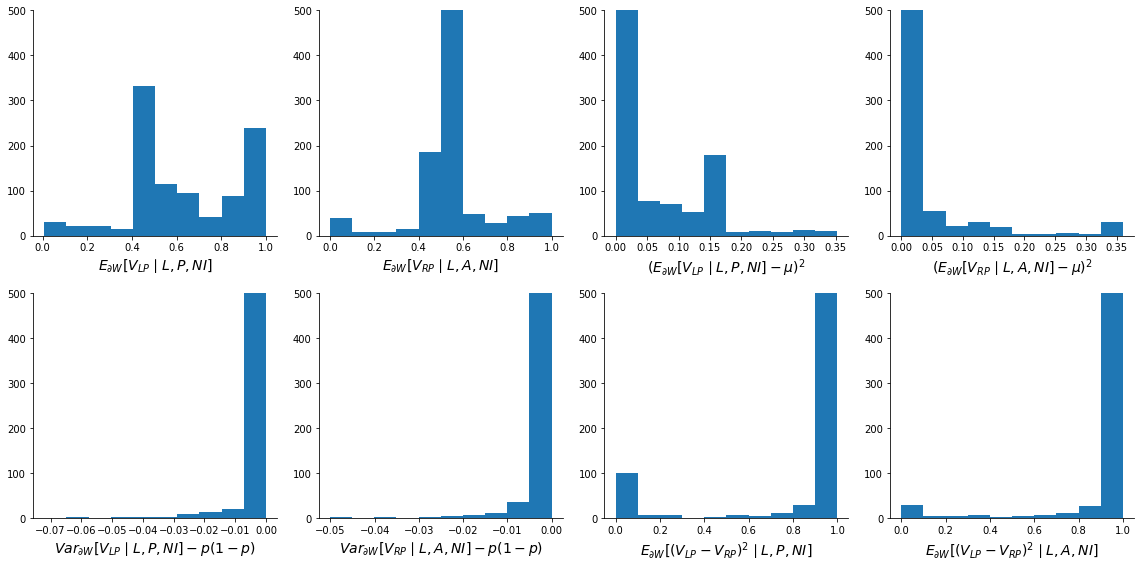

In [18]:
fontsize = 14

fig, axs = plt.subplots(2,4,figsize=(16,8))
for i in range(8):
    r = i // 4
    c = np.mod(i, 4)
    axs[r,c].hist(_T_x[0,:,i])
    axs[r,c].set_xlabel(system.T_x_labels[i], fontsize=fontsize)
    axs[r,c].set_ylim([0, 500])
    axs[r,c].spines['right'].set_visible(False)
    axs[r,c].spines['top'].set_visible(False)
    
plt.tight_layout()
plt.show()\


In [53]:
Ns = [10, 50, 100, 200, 500]
num_Ns = len(Ns)
K = 1000
p_hats = np.zeros((M, num_Ns, K))

for i in range(num_Ns):
    N = Ns[i]
    for k in range(K):
        rand_inds = np.random.choice(Ntrials, N, replace=False)
        p_hats[:,i,k] = np.mean(_v_t[-1,0,:,0,rand_inds], 0)


0.49899984095516425


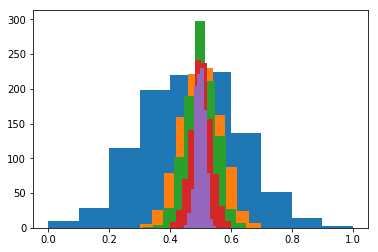

0.8541747962776153


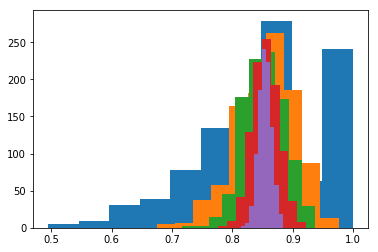

0.493


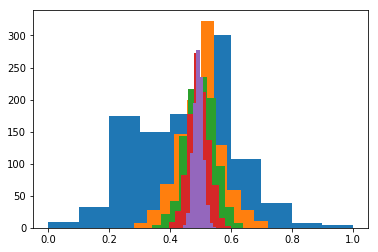

0.9999990474557758


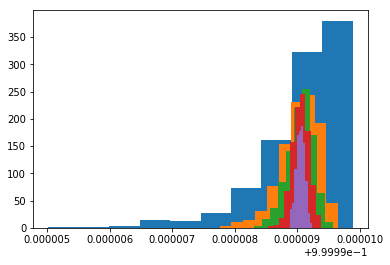

0.8240004310488882


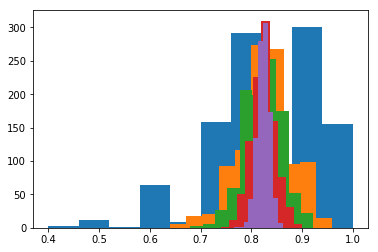

0.7429949999630548


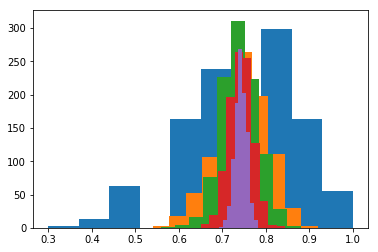

0.48


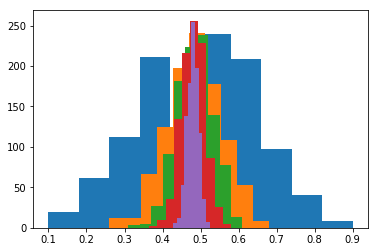

0.5129999976878985


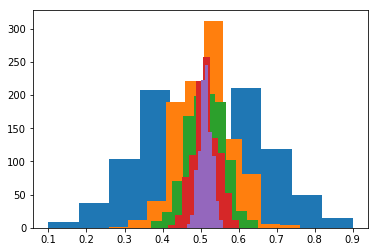

0.85


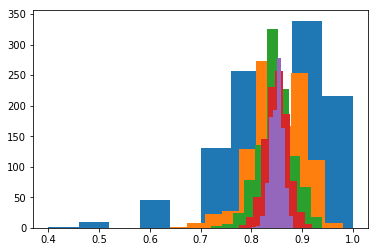

0.45570959419249363


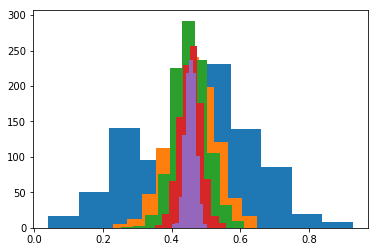

In [54]:
for i in range(10):
    plt.figure()
    print(_T_x[0,i,0])
    for j in range(num_Ns):
        plt.hist(p_hats[i,j])
    plt.show()

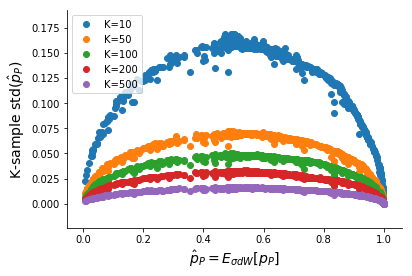

In [56]:
p_hat_stds = np.std(p_hats, axis=2)
plt.figure()
for i in range(num_Ns):
    plt.scatter(_T_x[0,:,0], p_hat_stds[:,i])
plt.legend(['K=%d' % i for i in Ns])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\hat{p}_P = E_{\sigma dW}[p_P]$', fontsize=fontsize)
ax.set_ylabel(r'K-sample std($\hat{p}_P$)', fontsize=fontsize)

plt.show()

In [ ]:
(75, 2, 1000, 4, 1000)